جهت مشاهده ی توضیحات کد و پاسخ سوالات به فایل توضیحات مراجعه کنید.

In [1]:
# mitra sharifian
# 994023025
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_moons
from sklearn.model_selection import train_test_split

In [2]:
x_moons,y_moons=make_moons(n_samples=200,noise=0.05,random_state=994023025)

In [3]:
x_blobs,y_blobs=make_blobs(n_samples=200,n_features=2,centers=2,cluster_std=2.75,random_state=994023025)

In [4]:
x_moons_train,x_moons_test,y_moons_train,y_moons_test=train_test_split(x_moons,y_moons,test_size=0.2,random_state=994023025)

In [5]:
x_blobs_train,x_blobs_test,y_blobs_train,y_blobs_test=train_test_split(x_blobs,y_blobs,test_size=0.2,random_state=994023025)

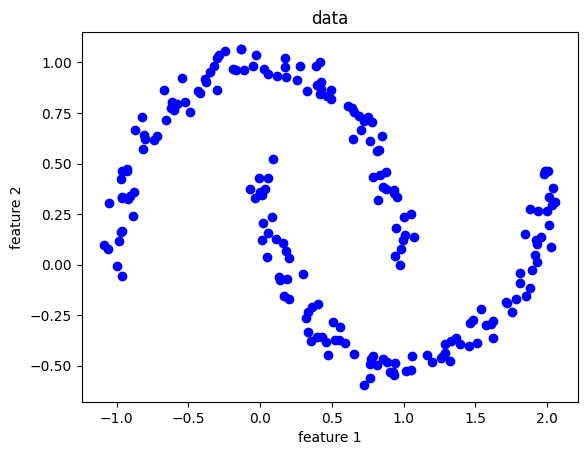

In [6]:
plt.scatter(x_moons[:, 0], x_moons[:, 1],c='b')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('data')
plt.show()

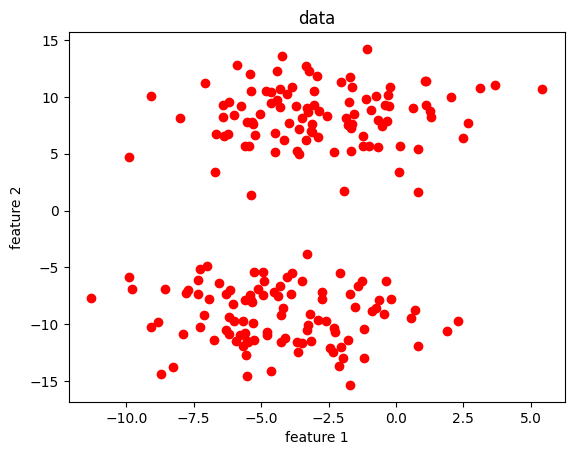

In [7]:
plt.scatter(x_blobs[:, 0], x_blobs[:, 1],c='r')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('data')
plt.show()

In [8]:
def relu(x):
    return np.maximum(0, x)


In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-1*x))
    

In [10]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


In [11]:
def relu_derivative(x):
    return np.where(x <= 0, 0, 1)


In [12]:
def threshold(x):
    return np.where(x>=0.5,1,0)


In [13]:
class NeuralNetwork:
    np.random.seed(994023025)
    def __init__(self, layer_sizes, activation_functions):
        np.random.seed(994023025)
        self.layer_sizes = layer_sizes
        self.activation_functions = activation_functions
        self.weights = []
        self.biases = []
        self.num_layers = 3
        
        # Initialize weights and biases for each layer
        for i in range(1, self.num_layers):
            input_size = self.layer_sizes[i-1]
            output_size = self.layer_sizes[i]
            self.weights.append(np.random.randn(output_size, input_size))
            self.biases.append(np.random.randn(output_size, 1))
    def loss(self, y_true, y_pred):
        return np.mean(np.square(y_true - y_pred))

    def forward_propagation(self, X):
        activations = [X]
        zs = []

        # Compute activations and weighted inputs for each layer
        for i in range(self.num_layers - 1):
            weight = self.weights[i]
            bias = self.biases[i]
            activation_function = self.activation_functions[i]
            
            z = np.dot(weight, activations[-1]) + bias
            zs.append(z)
            activation = activation_function(z)
            activations.append(activation)
        
        return activations, zs
    
    def backward_propagation(self, X, y, activations, zs):
        num_samples = X.shape[1]
        
        # Compute output layer error
        output_error = activations[-1] - y
        
        # Initialize gradients
        weight_gradients = [np.zeros(weight.shape) for weight in self.weights]
        bias_gradients = [np.zeros(bias.shape) for bias in self.biases]
        
        for i in range(self.num_layers - 2, -1, -1):
            activation_function = self.activation_functions[i]
            
            # Compute gradients for weights and biases
            activation = activations[i+1]
            z = zs[i]
            
            if activation_function == sigmoid:
                delta = output_error * sigmoid_derivative(activation[i])
            elif activation_function == relu:
                delta = output_error * relu_derivative(z)
            else:
                raise ValueError("Unsupported activation function.")
            
            weight_gradients[i] = np.dot(delta, activations[i].T) / num_samples
            bias_gradients[i] = np.mean(delta, axis=1, keepdims=True)
            
            # Compute error for the previous layer
            output_error = np.dot(self.weights[i].T, delta)
        
        
        return weight_gradients, bias_gradients
    
    def train(self, X, y, learning_rate, iter_max, convergence_threshold=None):
        num_samples = X.shape[1]
        costs = []
        
        for iteration in range(iter_max):
            activations, zs = self.forward_propagation(X)
            cost = self.loss(y,activations[-1]) # MSE
            
            if convergence_threshold is not None and iteration > 0:
                if np.abs(costs[-1] - cost) < convergence_threshold:
                    break
            if iteration % 100 == 0:
                print(f'Epoch {iteration}, Loss: {cost}')
                losses.append(cost)
                                      
            if iteration == iter_max - 1:
                print(f"Reached maximum iterations. Error: {cost}")
            costs.append(cost)
            
            weight_gradients, bias_gradients = self.backward_propagation(X, y, activations, zs)
            
            # Update weights and biases using gradient descent
            for i in range(self.num_layers - 1):
                self.weights[i] -= learning_rate * weight_gradients[i]
                self.biases[i] -= learning_rate * bias_gradients[i]
        
        return costs,losses
    
    def predict(self, X):
        activations, _ = self.forward_propagation(X)
        return threshold(activations[-1])

In [14]:
layer_sizes = [2,4,1]
activation_functions= [sigmoid,relu]
learning_rate = 0.01
iter_max = 1000
convergence_threshold = 1e-7
losses=[]

# training_blobs 
model = NeuralNetwork(layer_sizes, activation_functions)
costs,losses = model.train(x_blobs_train.T, y_blobs_train.T, learning_rate, iter_max, convergence_threshold)


Epoch 0, Loss: 1.8702810167561772
Epoch 100, Loss: 0.02662971144763886
Epoch 200, Loss: 0.023869845374974035
Epoch 300, Loss: 0.02352101748458105
Epoch 400, Loss: 0.023403934659855
Epoch 500, Loss: 0.02332181986316916
Epoch 600, Loss: 0.023239596493000097
Epoch 700, Loss: 0.02314814409095609
Epoch 800, Loss: 0.02304437768855611
Epoch 900, Loss: 0.022927205042144797
Reached maximum iterations. Error: 0.022799867839877704


In [15]:
# training_moons
model2 = NeuralNetwork(layer_sizes, activation_functions)
costs2,losses2 = model2.train(x_moons_train.T, y_moons_train.T, learning_rate, iter_max, convergence_threshold)


Epoch 0, Loss: 0.3285067586242565
Epoch 100, Loss: 0.18930421519152169
Epoch 200, Loss: 0.16436234932389296
Epoch 300, Loss: 0.14665584483355115
Epoch 400, Loss: 0.13348645223174366
Epoch 500, Loss: 0.1236217778975949
Epoch 600, Loss: 0.11617420677924702
Epoch 700, Loss: 0.11049712418845428
Epoch 800, Loss: 0.10611902908339825
Epoch 900, Loss: 0.10269668887392838
Reached maximum iterations. Error: 0.10000523306034621


In [16]:
# predictions on blobs data
predictions_blobs = model.predict(x_blobs_test.T)

In [17]:
model.loss(y_blobs_test, predictions_blobs)

0.025

In [18]:
# predictions on moons data
predictions_moons = model2.predict(x_moons_test.T)

In [19]:
model2.loss(y_moons_test, predictions_moons)

0.15

In [20]:
# ACC
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)
        
accuracy1 = accuracy_score(y_blobs_test, predictions_blobs)
print(f"Accuracy_blobs: {accuracy1*100}%")

accuracy2 = accuracy_score(y_moons_test,predictions_moons)
print(f"Accuracy_moons: {accuracy2*100}%")


Accuracy_blobs: 97.5%
Accuracy_moons: 85.0%


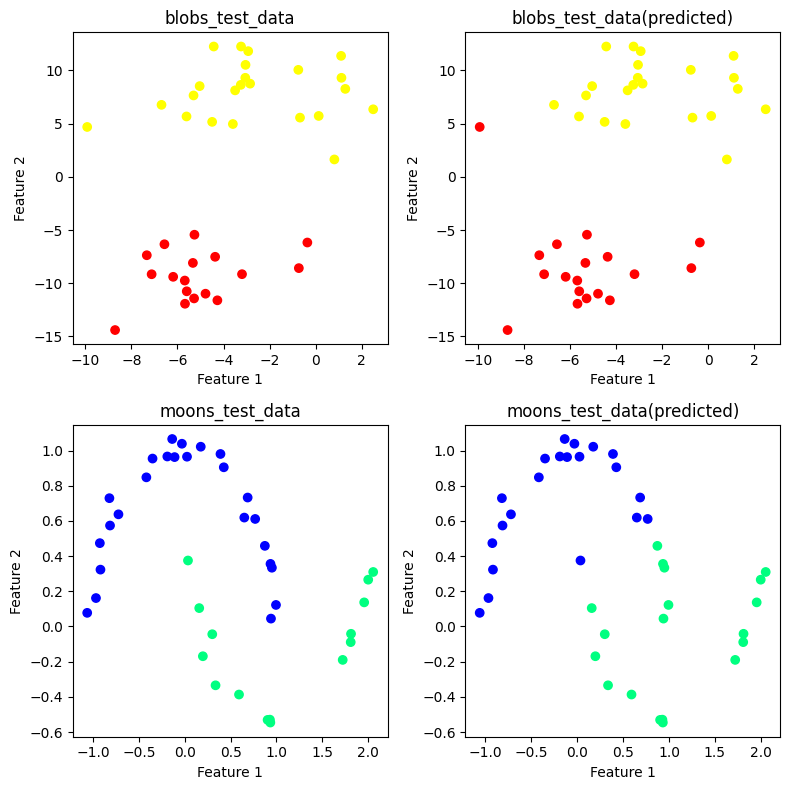

In [21]:
# Plot the results
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)

plt.scatter(x_blobs_test[:, 0], x_blobs_test[:, 1], c=y_blobs_test, cmap='autumn', alpha=1)
plt.title("blobs_test_data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(2, 2, 2)

plt.scatter(x_blobs_test[:, 0], x_blobs_test[:, 1], c=predictions_blobs, cmap='autumn', alpha=1)
plt.title('blobs_test_data(predicted)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


plt.subplot(2, 2, 3)

plt.scatter(x_moons_test[:, 0], x_moons_test[:, 1], c=y_moons_test, cmap='winter', alpha=1)
plt.title("moons_test_data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(2, 2, 4)

plt.scatter(x_moons_test[:, 0], x_moons_test[:, 1], c=predictions_moons, cmap='winter', alpha=1)
plt.title('moons_test_data(predicted)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

منبع نت و یوتوب